In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlite3

In [16]:
movie_gross_df = pd.read_csv('../../data/bom.movie_gross.csv.gz')
#grossdf.head(5)

In [17]:
movie_budgets_df = pd.read_csv('../../data/tn.movie_budgets.csv.gz')
#budgetdf.head(5)

# Data Organizing
Change the column "title in the bom.movie dataframe. This will then allow us to merge both dataframes on that column.

In [18]:
# Rename the title column to movie for merge with the movie_budget dataframe
movie_gross_df = movie_gross_df.rename(columns={'title': 'movie'})

# Data Merging
After the column name was changed we can now merge and begin our data exploration.

In [19]:
#connect moviegross and moviebudgets on movie
gross_budgets = pd.merge(movie_gross_df, movie_budgets_df, on= 'movie')

# Data Formatting
Before we can work with the numbers in the columns we have to remove the $ and any spaces that may exist.

In [20]:
# Have to reformat the worldwide_gross and production_budget columns to remove $ and space
gross_budgets['worldwide_gross'] = gross_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(int)
gross_budgets['production_budget'] = gross_budgets['production_budget'].replace('[\$,]', '', regex=True).astype(int)

# Data Calculation
Now we create a profit column in the dataframe and we calculate that by subtracting the "production_budget" column from the "worldwide_gross" column. It is a large number so we then divide by 1,000,000 to change it out of scientific notation.

In [21]:
# Create a profit column by subtracting production_budget from worldwide_gross
gross_budgets['profit'] = (gross_budgets['worldwide_gross'] - gross_budgets['production_budget'])/1000000

# First Visualization
This graph shows the top 10 studios that have the highest profit on average. It was created by combing the two dataframes movie_gross_df and  movie_budgets_df, calculating profit, and then grouping by the studio. The values are the average profit (mean).

Text(0.5, 1.0, 'Top 10 Studios by Average Profit')

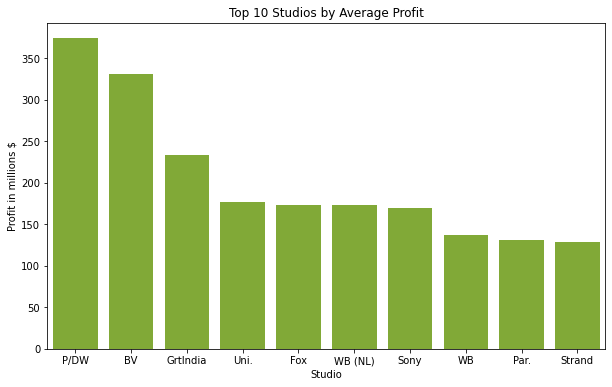

In [32]:
# Plot top 10 - Cleaned up
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='studio', y='profit', data=gross_budgets.groupby('studio')['profit'].mean().nlargest(10).reset_index(), color="#86BC24")
plt.ylabel('Profit in millions $')
plt.xlabel('Studio')
plt.title('Top 10 Studios by Average Profit')